In [2]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../../plankton'))

In [3]:
import plankton as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data_folder='data/leftCA1/'

coordinates = pd.read_csv(os.path.join(data_folder,'spots_w_segmentation_leftCA1_4-3.csv'))
signatures = pd.read_csv(os.path.join(data_folder,'../signatures_proteinaltlas_xiaoyan.csv'),index_col=0)

dapi_image = plt.imread(os.path.join(data_folder,'./CA1DapiBoundaries_4-3_left.tif'))
dapi_image = 1-(dapi_image/dapi_image.max())

bg_cells= np.load('./data/leftCA1/label_image.coo.npz')
cell_mask = np.zeros(bg_cells['shape'])
cell_mask[bg_cells['row'],bg_cells['col']]=bg_cells['data']

In [5]:
sdata = pl.SpatialData(genes=coordinates.gene,
                       x_coordinates=coordinates.spotX,
                       y_coordinates=coordinates.spotY,
                      pixel_maps=[pl.PixelMap(dapi_image),pl.PixelMask(cell_mask)])

(<matplotlib.collections.PathCollection at 0x7f4b951ef910>, None, None)

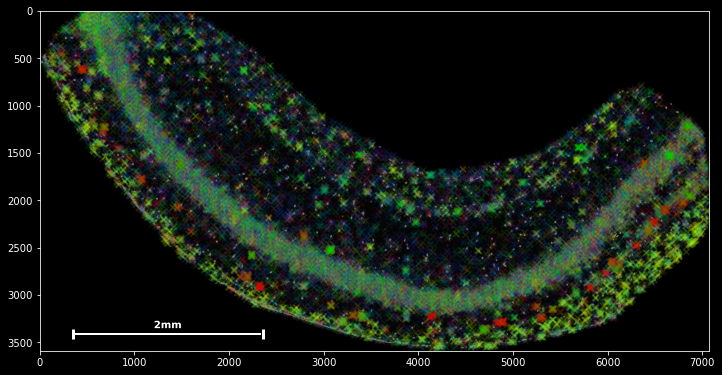

In [10]:
plt.figure(figsize=(12,10))
sdata.scatter(alpha=0.1,marker='x')

In [12]:
len(sdata.stats)

96

In [24]:
knn_neighbors=200
bandwidth=60
n_neighbors=30
metric='euclidean'
min_dist=0.03
random_state=42
zero_weight=1

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



In [20]:
knn_neighbors=100
bandwidth=11
n_neighbors=30
metric='euclidean'
min_dist=0.03
random_state=42
zero_weight=0.1

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



<IPython.core.display.Javascript object>


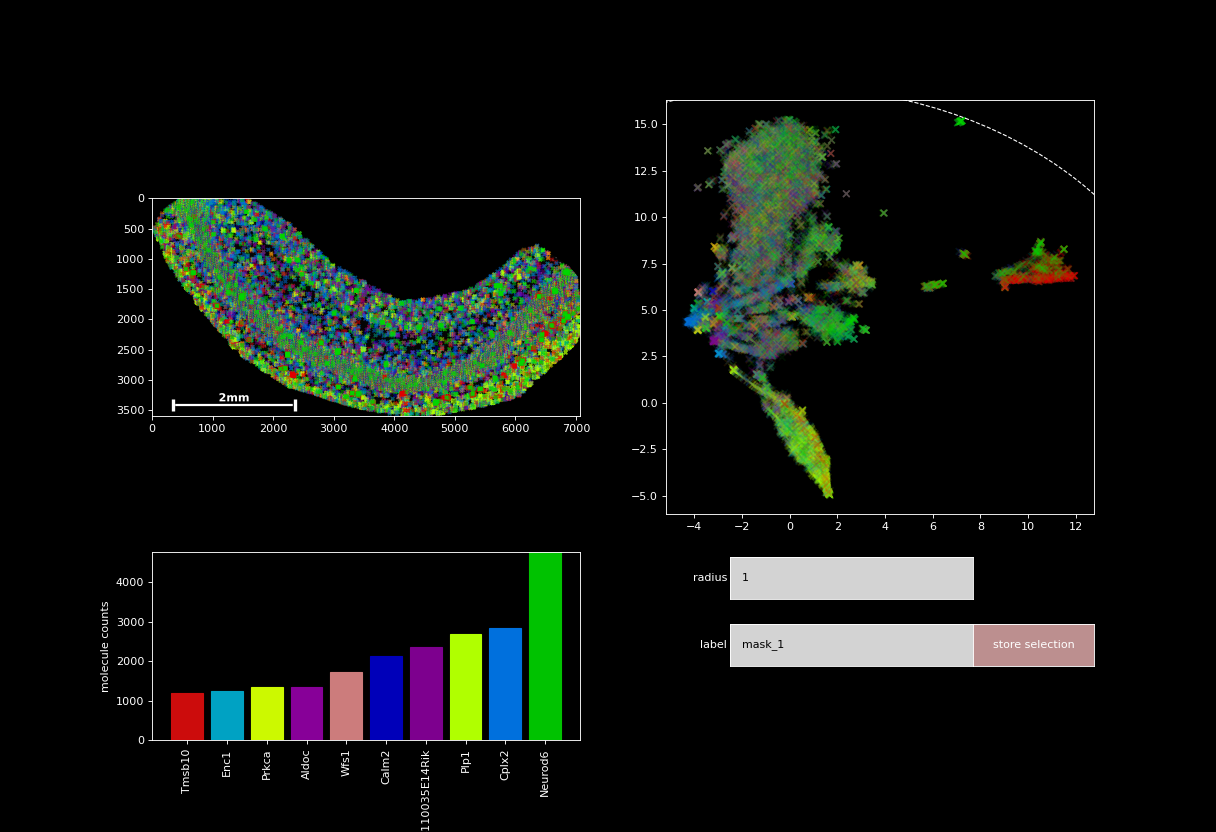

In [21]:
%matplotlib notebook

plt.style.use('dark_background')

plt.figure(figsize=(19,13))
sdata.graph.umap_interactive()

<IPython.core.display.Javascript object>


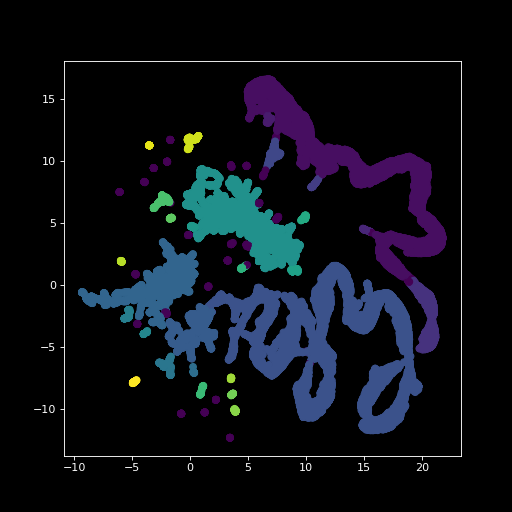

In [26]:
plt.figure(figsize=(8,8))
sdata.graph.plot_umap(c=labels_050)

In [6]:
%matplotlib inline

mp=pl.PixelMask(cell_mask)

In [28]:
mp.get_value(*np.where(mp.data>0)).sum()

[  26   26   26 ... 5466 5466 5466]


6550254935

<IPython.core.display.Javascript object>


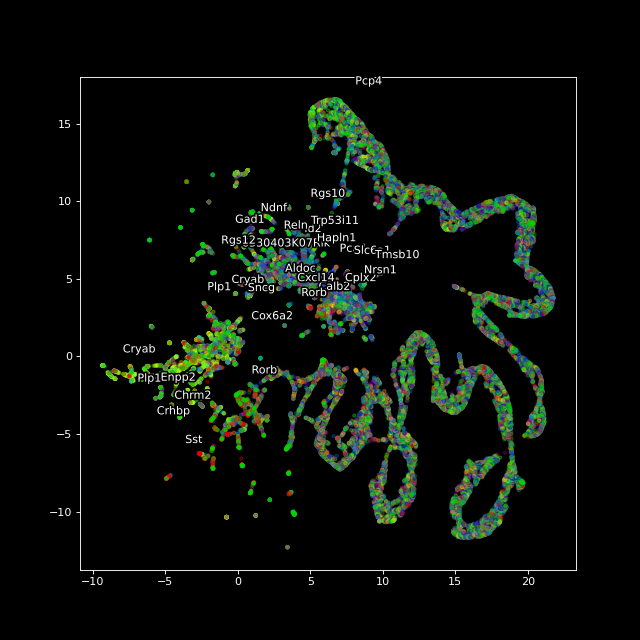

In [44]:
plt.figure(figsize=(8,8))
sdata.graph.plot_umap(text_prop='genes',alpha=0.3,marker='.',thlds_text=(0.1,0.2,0),text_distance=1.3)

In [4]:
sdata=pl.load('qian_segmemnts.pl')

umap=sdata.graph.umap

Index(['g', 'x', 'y', 'gene_id', 'act_1', 'act_2', 'act_3', 'act_4', 'act',
       'inh_1', 'inh_2'],
      dtype='object')


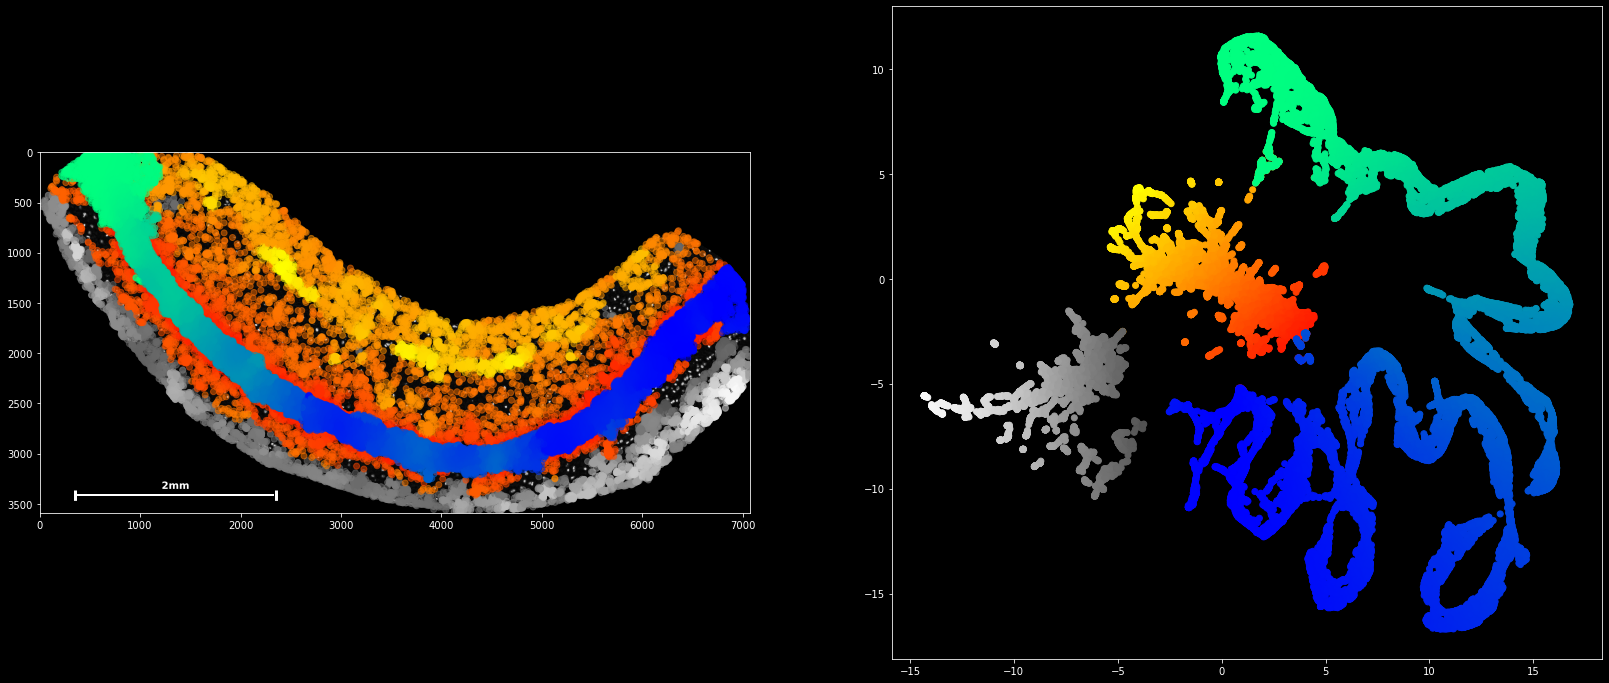

In [9]:
cumap=umap-5

plt.figure(figsize=(28,12))

dists = (cumap**2).sum(1)**0.5

numap=cumap/dists[:,None]
pumap=np.sin(numap[:,1])
pumap-=pumap.min()
pumap/=pumap.max()

cinh_1=-(-cumap[:,0]-cumap[:,1]*0)[sdata.inh_1]
cinh_2=(-cumap[:,0]+cumap[:,1])[sdata.inh_2]

plt.subplot(121)

sdata[sdata.inh_1].scatter(c=cinh_1,cmap='Greys',alpha=0.5,vmin=-15,vmax=0)
sdata[sdata.inh_2].scatter(c=cinh_2,cmap='autumn',alpha=0.5)
sdata[sdata.act].scatter(c=pumap[sdata.act]**0.7,cmap='winter',alpha=0.5)

plt.subplot(122)

# plt.scatter(*cumap[sdata.inh_1].T,c=cumap[:,0][sdata.inh_1],cmap='spring')

plt.scatter(*cumap[sdata.inh_2].T,c=cinh_2,cmap='autumn')
plt.scatter(*cumap[sdata.act].T,c=pumap[sdata.act]**0.7,cmap='winter',)
plt.scatter(*cumap[sdata.inh_1].T,c=cinh_1,cmap='Greys',vmin=-15,vmax=0)


In [11]:
sdata['act']=(sdata.act_1|sdata.act_2|sdata.act_3|sdata.act_4)

In [4]:
# sdata.save('qian_segmemnts.pl')

Index(['g', 'x', 'y', 'gene_id', 'act_1', 'act_2', 'act_3', 'act_4', 'act',
       'inh_1', 'inh_2'],
      dtype='object')
